In [54]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn import linear_model
import matplotlib.pyplot as plt


In [ ]:
'''
CRIM : crime per town
ZN  : Proportion of residental land zoned for lots over 25,000 sq.ft
INDUS:  Proportion of non-retail business acres per town
CHAS : Charles River dummy variable (1 = tract nounds river , 0 = otherwise)
NOX : Nitric oxide concetration
RM : Average number of rooms per dwelling
AGE : proportion of owner-occupied units built prior to 1940
DIS : weighted distances to five Boston Employment centers
RAD : Index of accessibility to radial highways
TAX : Full-value property tax rate per $10,000
PITRATIO : Pupil-teacher ratio by town
B : 1000(bk - 0.063)^2 , where BK is the proportion of people of african
LSTAT : percentage of lower status of ther population
MEDV : median value of owner-occupied homes in $1000s..

'''

In [5]:
data = pd.read_csv("housing.data", delim_whitespace=True , names = ['crim' , 'zn' , 'indus' , 'chas' ,'nox','rm','age','dis','rad','tax','ptratio','black','lstat','medv'])
data.head(10)

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
5,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222.0,18.7,394.12,5.21,28.7
6,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311.0,15.2,395.60,12.43,22.9
7,0.14455,12.5,7.87,0,0.524,6.172,96.1,5.9505,5,311.0,15.2,396.90,19.15,27.1
8,0.21124,12.5,7.87,0,0.524,5.631,100.0,6.0821,5,311.0,15.2,386.63,29.93,16.5
9,0.17004,12.5,7.87,0,0.524,6.004,85.9,6.5921,5,311.0,15.2,386.71,17.10,18.9


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
crim       506 non-null float64
zn         506 non-null float64
indus      506 non-null float64
chas       506 non-null int64
nox        506 non-null float64
rm         506 non-null float64
age        506 non-null float64
dis        506 non-null float64
rad        506 non-null int64
tax        506 non-null float64
ptratio    506 non-null float64
black      506 non-null float64
lstat      506 non-null float64
medv       506 non-null float64
dtypes: float64(12), int64(2)
memory usage: 55.4 KB


In [7]:
data.isnull().sum()

crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
black      0
lstat      0
medv       0
dtype: int64

In [9]:
scaler = MinMaxScaler()
datascaled = scaler.fit_transform(data)

In [13]:
data = pd.DataFrame(datascaled , columns = ['crim' , 'zn' , 'indus' , 'chas' ,'nox','rm','age','dis','rad','tax','ptratio','black','lstat','medv'])
 

In [14]:
data.head(10)

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.000000,0.180,0.067815,0.0,0.314815,0.577505,0.641607,0.269203,0.000000,0.208015,0.287234,1.000000,0.089680,0.422222
1,0.000236,0.000,0.242302,0.0,0.172840,0.547998,0.782698,0.348962,0.043478,0.104962,0.553191,1.000000,0.204470,0.368889
2,0.000236,0.000,0.242302,0.0,0.172840,0.694386,0.599382,0.348962,0.043478,0.104962,0.553191,0.989737,0.063466,0.660000
3,0.000293,0.000,0.063050,0.0,0.150206,0.658555,0.441813,0.448545,0.086957,0.066794,0.648936,0.994276,0.033389,0.631111
4,0.000705,0.000,0.063050,0.0,0.150206,0.687105,0.528321,0.448545,0.086957,0.066794,0.648936,1.000000,0.099338,0.693333
5,0.000264,0.000,0.063050,0.0,0.150206,0.549722,0.574665,0.448545,0.086957,0.066794,0.648936,0.992990,0.096026,0.526667
6,0.000921,0.125,0.271628,0.0,0.286008,0.469630,0.656025,0.402923,0.173913,0.236641,0.276596,0.996722,0.295254,0.397778
7,0.001554,0.125,0.271628,0.0,0.286008,0.500287,0.959835,0.438387,0.173913,0.236641,0.276596,1.000000,0.480684,0.491111
8,0.002303,0.125,0.271628,0.0,0.286008,0.396628,1.000000,0.450354,0.173913,0.236641,0.276596,0.974104,0.778146,0.255556
9,0.001840,0.125,0.271628,0.0,0.286008,0.468097,0.854789,0.496731,0.173913,0.236641,0.276596,0.974305,0.424117,0.308889


In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
crim       506 non-null float64
zn         506 non-null float64
indus      506 non-null float64
chas       506 non-null float64
nox        506 non-null float64
rm         506 non-null float64
age        506 non-null float64
dis        506 non-null float64
rad        506 non-null float64
tax        506 non-null float64
ptratio    506 non-null float64
black      506 non-null float64
lstat      506 non-null float64
medv       506 non-null float64
dtypes: float64(14)
memory usage: 55.4 KB


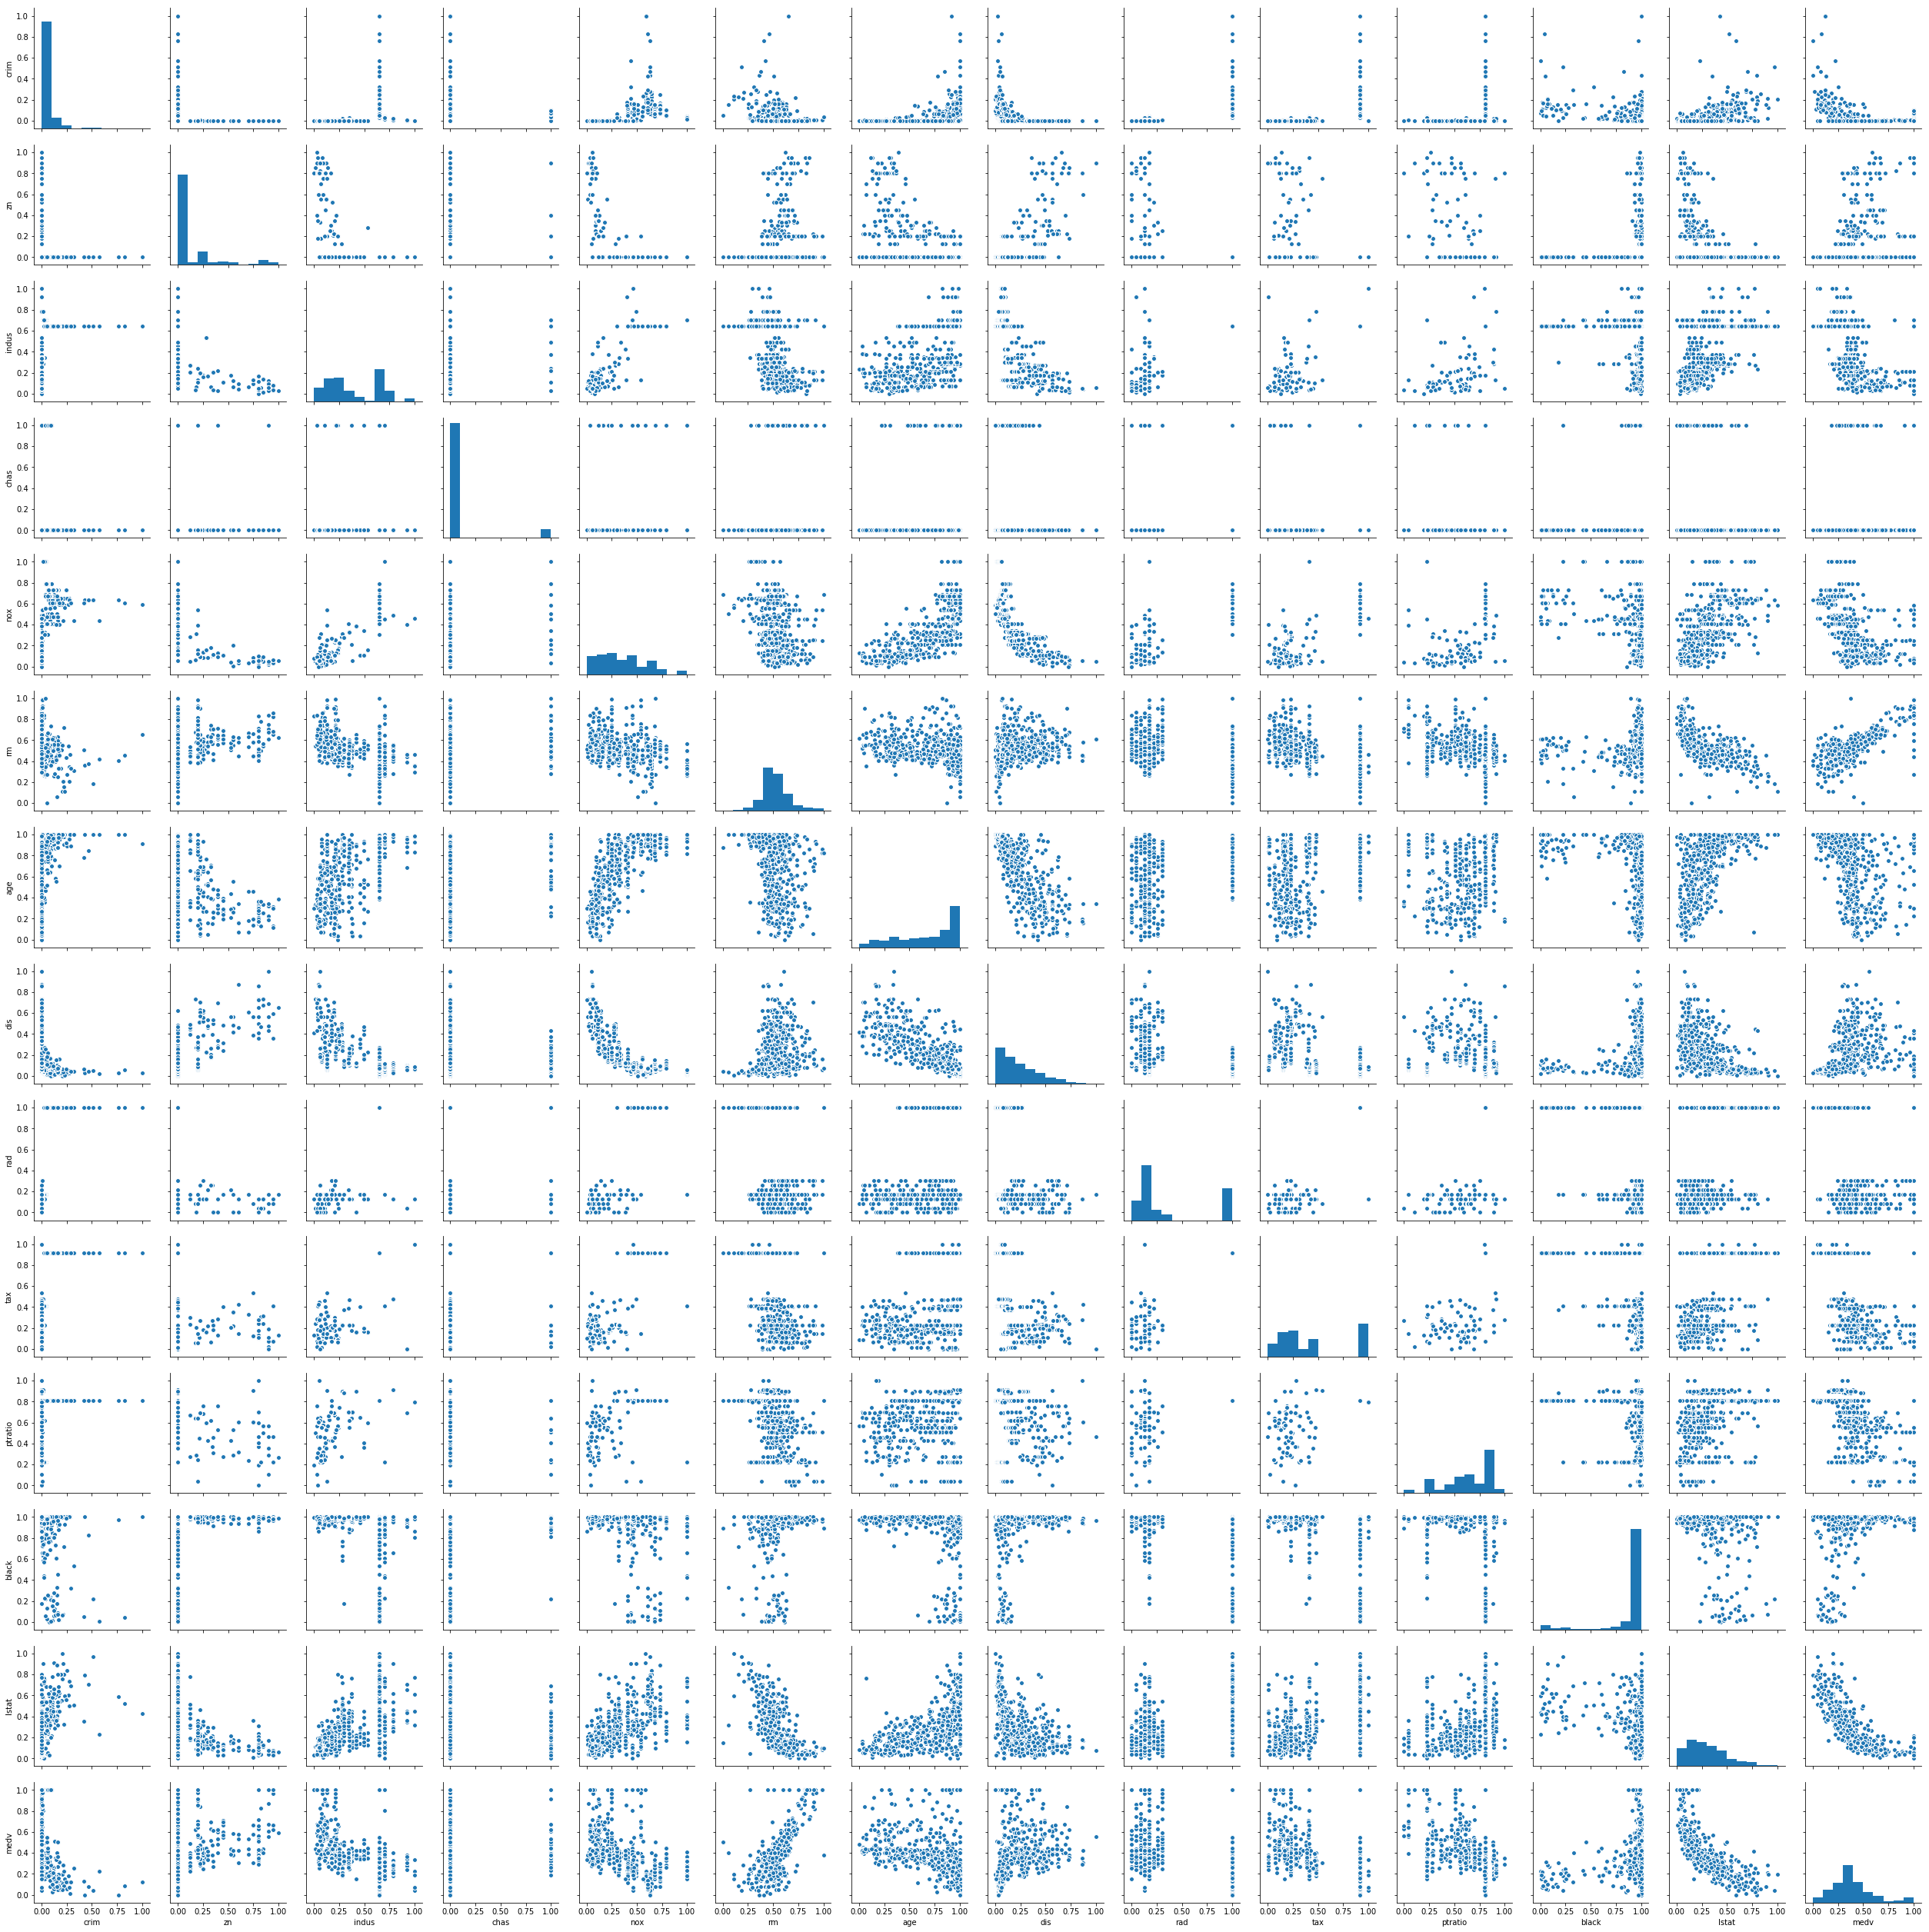

In [17]:
sns.pairplot(data)

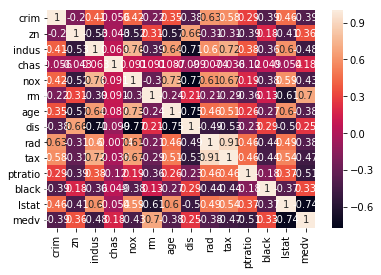

In [18]:
sns.heatmap(data.corr() , annot = True)

In [20]:
x = data.drop('medv' , axis=1)
y = data['medv']

In [23]:
train_x , test_x , train_y , test_y = train_test_split(x,y,test_size = 0.2 ,random_state = 0)

In [77]:
import keras
from keras.models import Sequential
from keras.layers import Dense , Dropout
from keras import metrics

In [78]:
model = Sequential()
model.add(Dense(20 , input_dim = 13 , activation='relu' , kernel_initializer='uniform'))
model.add(Dropout(p = 0.3))

model.add(Dense(10, activation='relu' , kernel_initializer='uniform'))
model.add(Dropout(p = 0.2))

model.add(Dense(1 ,activation='linear' , kernel_initializer='uniform'))


E:\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=0.3)`
  This is separate from the ipykernel package so we can avoid doing imports until
E:\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=0.2)`
  


In [79]:
model.compile(optimizer='adam' , loss='mean_squared_error' , metrics=['accuracy'])

In [80]:
history = model.fit(train_x , train_y , epochs=500 , verbose=1 , batch_size=10)

Epoch 1/500
404/404 [==============================] - 1s 3ms/step - loss: 0.1741 - accuracy: 0.0050
Epoch 2/500
404/404 [==============================] - 0s 352us/step - loss: 0.0946 - accuracy: 0.0050
Epoch 3/500
404/404 [==============================] - 0s 286us/step - loss: 0.0529 - accuracy: 0.0025
Epoch 4/500
404/404 [==============================] - 0s 233us/step - loss: 0.0458 - accuracy: 0.0074
Epoch 5/500
404/404 [==============================] - 0s 234us/step - loss: 0.0389 - accuracy: 0.0149
Epoch 6/500
404/404 [==============================] - 0s 225us/step - loss: 0.0313 - accuracy: 0.0099
Epoch 7/500
404/404 [==============================] - 0s 236us/step - loss: 0.0291 - accuracy: 0.0173
Epoch 8/500
404/404 [==============================] - 0s 242us/step - loss: 0.0315 - accuracy: 0.0099
Epoch 9/500
404/404 [==============================] - 0s 227us/step - loss: 0.0272 - accuracy: 0.0149
Epoch 10/500
404/404 [==============================] - 0s 221us/step - los

404/404 [==============================] - 0s 213us/step - loss: 0.0128 - accuracy: 0.0297
Epoch 79/500
404/404 [==============================] - 0s 228us/step - loss: 0.0128 - accuracy: 0.0322
Epoch 80/500
404/404 [==============================] - 0s 235us/step - loss: 0.0115 - accuracy: 0.0322
Epoch 81/500
404/404 [==============================] - 0s 206us/step - loss: 0.0112 - accuracy: 0.0322
Epoch 82/500
404/404 [==============================] - 0s 206us/step - loss: 0.0120 - accuracy: 0.0297
Epoch 83/500
404/404 [==============================] - 0s 234us/step - loss: 0.0110 - accuracy: 0.0347
Epoch 84/500
404/404 [==============================] - 0s 263us/step - loss: 0.0106 - accuracy: 0.0347
Epoch 85/500
404/404 [==============================] - 0s 225us/step - loss: 0.0123 - accuracy: 0.0322
Epoch 86/500
404/404 [==============================] - 0s 215us/step - loss: 0.0108 - accuracy: 0.0347
Epoch 87/500
404/404 [==============================] - 0s 212us/step - loss:

404/404 [==============================] - 0s 228us/step - loss: 0.0103 - accuracy: 0.0347
Epoch 157/500
404/404 [==============================] - 0s 222us/step - loss: 0.0117 - accuracy: 0.0322
Epoch 158/500
404/404 [==============================] - 0s 218us/step - loss: 0.0105 - accuracy: 0.0347
Epoch 159/500
404/404 [==============================] - 0s 209us/step - loss: 0.0096 - accuracy: 0.0347
Epoch 160/500
404/404 [==============================] - 0s 222us/step - loss: 0.0107 - accuracy: 0.0322
Epoch 161/500
404/404 [==============================] - 0s 226us/step - loss: 0.0106 - accuracy: 0.0322
Epoch 162/500
404/404 [==============================] - 0s 217us/step - loss: 0.0107 - accuracy: 0.0322
Epoch 163/500
404/404 [==============================] - 0s 214us/step - loss: 0.0102 - accuracy: 0.0347
Epoch 164/500
404/404 [==============================] - 0s 306us/step - loss: 0.0107 - accuracy: 0.0347
Epoch 165/500
404/404 [==============================] - 0s 353us/ste

404/404 [==============================] - 0s 231us/step - loss: 0.0110 - accuracy: 0.0347
Epoch 233/500
404/404 [==============================] - 0s 216us/step - loss: 0.0103 - accuracy: 0.0322
Epoch 234/500
404/404 [==============================] - 0s 224us/step - loss: 0.0102 - accuracy: 0.0347
Epoch 235/500
404/404 [==============================] - 0s 218us/step - loss: 0.0101 - accuracy: 0.0347
Epoch 236/500
404/404 [==============================] - 0s 212us/step - loss: 0.0109 - accuracy: 0.0347
Epoch 237/500
404/404 [==============================] - 0s 322us/step - loss: 0.0111 - accuracy: 0.0322
Epoch 238/500
404/404 [==============================] - 0s 217us/step - loss: 0.0109 - accuracy: 0.0347
Epoch 239/500
404/404 [==============================] - 0s 214us/step - loss: 0.0120 - accuracy: 0.0322
Epoch 240/500
404/404 [==============================] - 0s 218us/step - loss: 0.0098 - accuracy: 0.0322
Epoch 241/500
404/404 [==============================] - 0s 202us/ste

404/404 [==============================] - 0s 265us/step - loss: 0.0095 - accuracy: 0.0322
Epoch 311/500
404/404 [==============================] - 0s 233us/step - loss: 0.0102 - accuracy: 0.0347
Epoch 312/500
404/404 [==============================] - 0s 234us/step - loss: 0.0098 - accuracy: 0.0322
Epoch 313/500
404/404 [==============================] - 0s 231us/step - loss: 0.0079 - accuracy: 0.0347
Epoch 314/500
404/404 [==============================] - 0s 254us/step - loss: 0.0096 - accuracy: 0.0347
Epoch 315/500
404/404 [==============================] - 0s 251us/step - loss: 0.0106 - accuracy: 0.0347
Epoch 316/500
404/404 [==============================] - 0s 247us/step - loss: 0.0105 - accuracy: 0.0322
Epoch 317/500
404/404 [==============================] - 0s 238us/step - loss: 0.0090 - accuracy: 0.0347
Epoch 318/500
404/404 [==============================] - 0s 226us/step - loss: 0.0095 - accuracy: 0.0347
Epoch 319/500
404/404 [==============================] - ETA: 0s - lo

404/404 [==============================] - 0s 226us/step - loss: 0.0100 - accuracy: 0.0347
Epoch 388/500
404/404 [==============================] - 0s 217us/step - loss: 0.0110 - accuracy: 0.0322
Epoch 389/500
404/404 [==============================] - 0s 254us/step - loss: 0.0095 - accuracy: 0.0322
Epoch 390/500
404/404 [==============================] - 0s 222us/step - loss: 0.0097 - accuracy: 0.0347
Epoch 391/500
404/404 [==============================] - 0s 264us/step - loss: 0.0093 - accuracy: 0.0347
Epoch 392/500
404/404 [==============================] - 0s 339us/step - loss: 0.0100 - accuracy: 0.0347
Epoch 393/500
404/404 [==============================] - 0s 348us/step - loss: 0.0101 - accuracy: 0.0347
Epoch 394/500
404/404 [==============================] - 0s 364us/step - loss: 0.0098 - accuracy: 0.0347
Epoch 395/500
404/404 [==============================] - 0s 435us/step - loss: 0.0093 - accuracy: 0.0347
Epoch 396/500
404/404 [==============================] - 0s 354us/ste

404/404 [==============================] - 0s 252us/step - loss: 0.0085 - accuracy: 0.0347TA: 0s - loss: 0.0079 - accuracy: 0.0455  
Epoch 465/500
404/404 [==============================] - 0s 244us/step - loss: 0.0098 - accuracy: 0.0347
Epoch 466/500
404/404 [==============================] - 0s 231us/step - loss: 0.0112 - accuracy: 0.0272
Epoch 467/500
404/404 [==============================] - 0s 229us/step - loss: 0.0107 - accuracy: 0.0322
Epoch 468/500
404/404 [==============================] - 0s 234us/step - loss: 0.0104 - accuracy: 0.0347
Epoch 469/500
404/404 [==============================] - 0s 237us/step - loss: 0.0102 - accuracy: 0.0347
Epoch 470/500
404/404 [==============================] - 0s 222us/step - loss: 0.0101 - accuracy: 0.0347
Epoch 471/500
404/404 [==============================] - 0s 255us/step - loss: 0.0097 - accuracy: 0.0347
Epoch 472/500
404/404 [==============================] - 0s 261us/step - loss: 0.0100 - accuracy: 0.0322
Epoch 473/500
404/404 [====

In [81]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 20)                280       
_________________________________________________________________
dropout_1 (Dropout)          (None, 20)                0         
_________________________________________________________________
dense_6 (Dense)              (None, 10)                210       
_________________________________________________________________
dropout_2 (Dropout)          (None, 10)                0         
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 11        
Total params: 501
Trainable params: 501
Non-trainable params: 0
_________________________________________________________________


In [82]:
pred = model.predict(test_x)

In [83]:
score = model.evaluate(test_x , test_y, verbose=0)

In [84]:
score

[0.014353866784778587, 0.019607843831181526]

In [85]:
l = LinearRegression()
l.fit(train_x , train_y)
l_pred = l.predict(test_x)

Text(0.5,1,'Linear Regression')

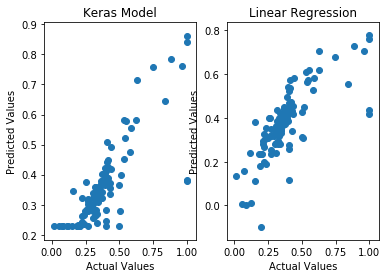

In [86]:
plt.subplot(121)
plt.scatter(test_y , pred)
 
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Keras Model")


plt.subplot(122)
plt.scatter(test_y , l_pred)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Linear Regression")

In [87]:
mean_squared_error(test_y , l_pred)

0.016518014813667433